<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Datasets" data-toc-modified-id="Importing-Datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Datasets</a></span><ul class="toc-item"><li><span><a href="#Importing-Model-dev-data" data-toc-modified-id="Importing-Model-dev-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing Model dev data</a></span></li></ul></li><li><span><a href="#Initial-Analysis" data-toc-modified-id="Initial-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Analysis</a></span></li><li><span><a href="#Preprocessing-and-Null-Value-Treatment" data-toc-modified-id="Preprocessing-and-Null-Value-Treatment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing and Null Value Treatment</a></span><ul class="toc-item"><li><span><a href="#Preprocessing-Functions" data-toc-modified-id="Preprocessing-Functions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preprocessing Functions</a></span></li><li><span><a href="#Null-Value-Imputation" data-toc-modified-id="Null-Value-Imputation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Null Value Imputation</a></span></li></ul></li><li><span><a href="#Training-Decision-Tree---Iteration-1" data-toc-modified-id="Training-Decision-Tree---Iteration-1-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training Decision Tree - Iteration 1</a></span><ul class="toc-item"><li><span><a href="#Prerequisite-Functions" data-toc-modified-id="Prerequisite-Functions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Prerequisite Functions</a></span></li><li><span><a href="#Creating-Train-Test-split" data-toc-modified-id="Creating-Train-Test-split-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Creating Train-Test split</a></span></li><li><span><a href="#Optimal-Hyperparameters" data-toc-modified-id="Optimal-Hyperparameters-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Optimal Hyperparameters</a></span></li><li><span><a href="#Training-Decision-Tree" data-toc-modified-id="Training-Decision-Tree-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Training Decision Tree</a></span></li><li><span><a href="#Performance-Measures" data-toc-modified-id="Performance-Measures-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Performance Measures</a></span></li><li><span><a href="#Getting-the-rules-of-decision-tree" data-toc-modified-id="Getting-the-rules-of-decision-tree-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Getting the rules of decision tree</a></span><ul class="toc-item"><li><span><a href="#Running-regression-model-for-each-sample" data-toc-modified-id="Running-regression-model-for-each-sample-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Running regression model for each sample</a></span></li></ul></li></ul></li><li><span><a href="#Optimization" data-toc-modified-id="Optimization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Optimization</a></span></li><li><span><a href="#Phosphorus-Predictions" data-toc-modified-id="Phosphorus-Predictions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Phosphorus Predictions</a></span></li><li><span><a href="#Working---Not-Relevant-to-Production-Code" data-toc-modified-id="Working---Not-Relevant-to-Production-Code-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Working - Not Relevant to Production Code</a></span><ul class="toc-item"><li><span><a href="#Testing-Models" data-toc-modified-id="Testing-Models-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Testing Models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-Testing" data-toc-modified-id="Logistic-Regression-Testing-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Logistic Regression Testing</a></span></li></ul></li></ul></li></ul></div>

In [141]:
# Libraries
import pandas as pd
import numpy as np
import time
import datetime
from datetime import timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import os
#from sklearn.externals import joblib
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from numpy import arange
import time
#from xgboost import plot_importance
from sklearn.model_selection import train_test_split
#import xgboost
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from math import sqrt
from sklearn.preprocessing import LabelEncoder
import pulp
#from pycaret.regression import *
import dill
import json
from pathlib import Path
import statsmodels.api as sm
from tqdm import tqdm
from pulp import *

In [142]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_rows',500)
pd.set_option('max_columns',500)

# registering progress apply
tqdm.pandas(desc = "Processing Dataframe")

# run label
now = datetime.datetime.now()
now = now.strftime('%Y_%m_%d_%H_%M_%S')

import os
output_path=os.getcwd()+'\\Output Files'
Path(output_path).mkdir(parents = True, exist_ok = True)

# input path
input_path=os.getcwd()+'\\Input Files'
#input_path = "../Input Files/"

### Importing Datasets

#### Importing Model dev data

In [143]:
# reading
model_dev = pd.read_excel("raw_data.xlsx")

In [144]:
model_dev

,File Name,Heat,Date,Shift,Grade,Start,Tap End,Previous Tap End,HotMetal [t],BathWt [t],Total Cyle Duration,1st Blow Start [datetime],Last Blow End [datetime],1st Arc Start [datetime],Last Arc End [datetime],SetDur,BlowDur,ArcDur,TapDur,Toplance Height [Mtr],ToplanceFlowRate [Nm3/h],O2Toplance [Nm3],O2SideLance-B [Nm3],O2SideLance-A [Nm3],Tot O2 [Nm3],Profile,Launder,Hot Heel [t],Scrap [t],Harsco [t],Refurnace [t],TorpedoNo1 [Num],TorpedoNo2 [Num],DRI-Blow [t],DRI-Arc [t],DRI [t],LIME-BLOWI [t],LIME-ARC [t],TOTALLIME [t],DOLO-BLOW [t],DOLO-ARC [t],TOTALDOLO [t],Coke Nut [Kg],Coke F [Kg],Steel [t],Yield [%],Tot. El. Energy [kWh],Energy [kWh/t],O2AftCelox [Nm3],O2/HM [Nm3/t],Power-Off [min],BlowToArc [min],ArcToTap [min],BlowToTap [min],Delay [min],Temp [Â°C],C [%],O [ppm],O2DECARB [NmÂ³],DRI Setup,Lime Setup,Dololime Setup,Shell,HM_C,HM_SI,HM_S,HM_P,HM_N,HM_MN,LM_P,Slag\n%CaO,Slag\n%MgO,Slag\n%SiO2,Slag\n%AI2O3,Slag %TIO2,Slag %TFE,Slag %MnO,Slag %P2O5,Slag %S,Slag Chemistry (Y/N),Basicity
0,JUNE_JULY_21,21102439,2021-06-01,C,JDTL0550DN,23:03:00,00:08:00,22:47:00,131.0,233.1,01:20:56,23:03:49,23:33:52,23:37:23,00:02:00,00:16:30,00:30:03,00:24:37,00:02:14,10.4,231.6,6880.4,840.8,3391.5,11908.7,CONARC without SCRAP Cojet1-3,Top,43.0,15.0,15.0,NaN,8,NaN,8.6,63.9,72.5,8.5,NaN,10.0,NaN,8.0,8.0,670.0,92.1,177.3,75.3,41991.7,236.9,0.0,86.7,56.3,00:03:31,00:04:01,00:00:00,7.7,1656.0,0.030,928.0,3392,0.0,1.5,0.0,1,4.58,0.60,0.029,0.128,0.004,0.709,0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
1,JUNE_JULY_21,21402457,2021-06-01,C,JDHCG04B1N,23:32:00,00:42:00,23:15:00,131.0,227.1,01:27:07,23:32:20,23:59:34,00:03:02,00:30:31,00:17:09,00:27:14,00:27:29,00:02:11,10.4,238.7,6293.2,683.9,3113.0,10934.1,CONARC without SCRAP Cojet1-3,Launder,30.0,NaN,NaN,NaN,7,NaN,29.2,66.6,95.8,5.0,3.7,8.7,NaN,5.8,9.0,180.0,1502.0,194.6,85.5,40700.0,209.1,0.0,78.5,59.6,00:03:28,00:09:36,00:00:00,16.8,1620.0,0.030,896.0,3113,0.0,0.0,3.2,4,4.56,0.55,0.032,0.122,0.004,0.699,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
2,JUNE_JULY_21,21202401,2021-06-01,C,JDHWT41KLZ,23:35:00,00:36:00,23:18:00,138.0,235.2,01:17:42,23:35:04,00:05:35,00:08:25,00:30:46,00:16:38,00:30:31,00:22:21,00:02:40,10.3,244.0,7256.8,700.4,3188.8,11757.8,CONARC with SCRAP,Top,40.4,17.0,13.0,NaN,7,NaN,1.0,66.2,67.2,2.7,7.1,9.8,NaN,4.0,6.0,140.0,397.1,182.4,76.7,35563.7,194.9,112.0,81.9,56.1,00:02:50,00:02:42,00:00:00,3.4,1603.0,0.024,1121.0,3189,0.0,0.0,2.0,2,4.56,0.55,0.032,0.122,0.004,0.699,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
3,JUNE_JULY_21,21302425,2021-06-01,C,JDTL0550DN,00:04:00,01:14:00,23:53:00,129.0,210.2,01:21:44,00:04:47,00:32:33,00:43:30,01:08:15,00:11:36,00:27:45,00:24:45,00:02:24,10.6,222.2,5849.0,753.8,2832.8,10196.2,CONARC without SCRAP Cojet1-3,Launder,9.0,NaN,NaN,NaN,2,NaN,24.9,56.4,81.3,4.1,4.6,8.7,NaN,6.5,9.8,110.0,232.0,191.4,90.9,36600.0,191.2,0.0,74.2,57.0,00:10:57,00:04:16,00:00:00,12.4,1602.0,0.027,964.0,2833,0.0,0.0,3.3,3,4.51,0.34,0.031,0.126,0.004,0.697,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
4,JUNE_JULY_21,21102440,2021-06-01,C,JDHWT41KLZ,00:32:00,01:44:00,00:08:00,130.0,229.2,01:36:41,00:32:46,01:03:17,01:12:23,01:37:14,00:24:31,00:30:31,00:24:51,00:04:03,10.4,234.3,6906.5,825.2,4201.7,12958.5,CONARC 100% DRI Single Shell,Top,51.4,17.0,13.0,NaN,9,NaN,9.0,59.8,68.8,10.8,1.0,11.8,NaN,5.8,7.8,NaN,309.4,180.7,78.0,42032.0,232.5,0.0,94.1,72.4,00:09:06,00:03:39,00:00:00,54.4,1658.0,0.022,1306.0,4202,0.0,0.0,2.0,1,4.63,0.75,0.014,0.135,0.004,0.889,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13430,NaN,21200587,2021-02-05,2/A,JDHWT41ALN,21:08:00,22:11:00,20:58:00,165.0,212.5,01:12:47,21:08:42,22:06:14,NaN,NaN,00:10:28,00:57

In [145]:
# hotfix for hm chems
hm_chems = pd.read_excel("heat_wise_hm_chem_wa.xlsx")

In [146]:
# merging with model_dev
model_dev = model_dev.merge(hm_chems, left_on = 'Heat', right_on = 'HEAT_NAME', how = 'left')

In [147]:
# renaming the columns
for each in ['C','SI','S','P','N','MN']:
    model_dev['HM_' + each] = model_dev['COMP_' + each]

### Initial Analysis

In [148]:
# cols required
# initial analysis

cols = [
        'Heat',
        'DRI Setup',
        'Lime Setup',
        'Dololime Setup',
        'HotMetal [t]',
        'BathWt [t]',
        #'Total Cyle Duration ',
        'BlowDur ',
        'ArcDur ',
        'Toplance Height [Mtr]',
        'ToplanceFlowRate [Nm3/h]',
        'O2Toplance [Nm3]',
        'Profile ',
        'Scrap [t]',
        'Harsco [t]',
        'DRI-Blow [t]',
        'DRI-Arc [t]',
        'LIME-BLOWI [t]',
        'LIME-ARC [t]',
        'DOLO-BLOW [t]',
        'DOLO-ARC [t]',
        'Coke Nut [Kg]',
        'Coke F [Kg]',
        'Tot. El. Energy [kWh]',
        'Temp [Â°C]',
        'O2DECARB [NmÂ³]',
        'HM_C',
        'HM_SI',
        'HM_S',
        'HM_P',
        'HM_MN',
        'LM_P'
       ]

# to predict
# target = 'LM_P'

In [149]:
# splitting to have only CONARC
# 100% Blowing model will be done separately
model_dev = model_dev[cols]

In [150]:
# cleaning up column names for ease of processing
model_dev.columns = [x.split('[')[0].strip() for x in model_dev.columns]

In [151]:
# checking percentage of nulls in shortlisted cols
model_dev.isna().sum()*100/len(model_dev)

Heat                 0.000000
DRI Setup            0.000000
Lime Setup           0.000000
Dololime Setup       0.000000
HotMetal             0.000000
BathWt               0.000000
BlowDur              0.000000
ArcDur               0.000000
Toplance Height      0.000000
ToplanceFlowRate     0.000000
O2Toplance           0.000000
Profile              0.000000
Scrap               81.116487
Harsco              85.530331
DRI-Blow             0.826200
DRI-Arc              8.567175
LIME-BLOWI           0.498697
LIME-ARC            12.340901
DOLO-BLOW           90.368441
DOLO-ARC            11.641236
Coke Nut            52.646074
Coke F               1.027168
Tot. El. Energy      0.000000
Temp                 0.498697
O2DECARB             0.000000
HM_C                 0.000000
HM_SI                0.000000
HM_S                 0.000000
HM_P                 0.000000
HM_MN                0.000000
LM_P                 0.000000
dtype: float64

In [152]:
# creating ads
ads = model_dev.copy()

### Preprocessing and Null Value Treatment

#### Preprocessing Functions

In [153]:
def calculating_time_in_minutes(row):
    """
    
    This function will convert the date time column to minutes
    """
    try:
        row['BlowDur_Minutes'] = row['BlowDur'].hour * 60 + row['BlowDur'].minute + row['BlowDur'].second / 60
    except:
        row['BlowDur_Minutes'] = 0
        
    try:
        row['ArcDur_Minutes'] = row['ArcDur'].hour * 60 + row['ArcDur'].minute + row['ArcDur'].second / 60
    except:
        row['ArcDur_Minutes'] = 0
    
#     try:
#         row['TotalDur_Minutes'] = row['Total Cyle Duration'].hour * 60 + row['Total Cyle Duration'].minute + row['Total Cyle Duration'].second / 60
#     except:
#         row['TotalDur_Minutes'] = 0

    return row

In [154]:
def univariate(df):
    """
     
    Intended to provide a percentile distribution for numeric columns and 
    frenquency counts for categorical variables
    returns : data frame with univariates for each column
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','object']
    quantiles = [0,0.001,0.01,0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.95,0.99,0.999,1]
    
    df_num = pd.DataFrame(df.select_dtypes(include=numerics).quantile(quantiles).transpose())
    num_cols = df_num.index.tolist()
    char_cols = [cols for cols in df.columns if cols not in num_cols]
    
    """
    df_char = df[char_cols]
    df_cat_agg = pd.DataFrame()
    
    # Frequency counts for char columns 
    if len(char_cols) > 0:
        count = 0
        for col in char_cols:
            df_ = df_char.groupby(col).agg(['count'])
            df_['column_name'] = col
            df_cat_agg = df_cat_agg.append(df_)      
    
    #return df_num,df_cat_agg
    """
    
    return df_num

In [155]:
def outlier_treatment(df,col_list,lv_imp,uv_imp):
    """
    
    Intended to treat outlier values based on defined thresholds lv and uv
    returns : dataframe with values treated for outliers
    """
    for col,lv,uv in zip(col_list,lv_imp,uv_imp):
        df[col+'_treated'] = [uv if x>uv else x for x in df[col]]
        df[col+'_treated'] = [lv if x<lv else x for x in df[col+'_treated']]
    
    return df

In [156]:
def impute_missing(df,cols=[],simple_impute=True,impute_value=0):
    """
    
    Intended to impute missing values for the specified columns by the specified value
    returns : dataframe with imputed values
    """
    if simple_impute == 1:
            if len(cols)>0:
                df[cols] = df[cols].fillna(value=impute_value)
            else:
                df.fillna(impute_value,inplace=True)
    else:
        df.fillna(df[cols].median(),inplace=True)
        print("Column and Median to be replace : ",cols, df[cols].median())
    
    return df

In [157]:
def missing_value_perc(df):
    """
    
    Intended to get a summary of missing values for each column in a df
    returns: summarized column wise missing value percentage
    """
    # Summarise null values in a df
    df_ = pd.DataFrame({'missing_count':df.isnull().sum() , 'total_count': len(df)})    
    # Get the % Missing for each column
    df_['missing_perc'] = df_['missing_count']/df_['total_count']
    
    return df_ 

In [158]:
def outlier_detect_iqr(df, col):
    """
    Calculate Q1, Q3, IQR
    Returns capped value
    
    Logic:
    if x < q1 - 1.5iqr -> q1 - 1.5iqr
    if x > q3 + 1.5iqr -> q3 + 1.5iqr
    """
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    df[col + '_treated'] = df[col].apply(lambda x: q1 - 1.5*iqr if x < (q1 - 1.5*iqr) else q3 + 1.5*iqr if x > (q3 + 1.5*iqr) else x)

In [159]:
def filter_outliers(df, col, uv, lv):
    """
    :param col: column of ads
    :param uv: upper limit
    :param lv: lower limit
    
    filter out all rows not falling within uv and lv for col
    """
    
    df = df[(df[col] >= lv) & (df[col] <= uv)]
    
    return df

#### Null Value Imputation

In [160]:
# cols to fill with 0
cols = [
    'Scrap',
    'Harsco',
    'DOLO-BLOW',
    'Coke Nut',
    'Coke F',
    'DRI-Arc',
    'LIME-ARC',
    'DOLO-ARC']

ads[cols] = ads[cols].fillna(0)

In [161]:
# converting
ads = ads.apply(calculating_time_in_minutes, axis = 1)

# deleting the original dur rows
#del ads['Total Cyle Duration']
del ads['BlowDur']
del ads['ArcDur']

In [162]:
# filtering out cases where Profile is null
ads = ads[ads['Profile'].isna() == False]

# removing all the profiles which were 'arc-cojet'
ads = ads[ads['Profile'].str.contains('arc-cojet', case = False) == False]

#creating arc flag
#all conarc/arcing profiles have the word 'arc' in them
#the remaining are 100% blowing
ads['Arcing Flag'] = ads['Profile'].apply(lambda x: 1 if 'arc' in x.lower() else 0)

# removing profile and keeping only profile type
del ads['Profile']

In [163]:
# dropping rows where target variable is null
ads.dropna(subset = ['LM_P'], inplace = True)

In [164]:
# getting list of cols which have nulls in them
null_cols = [x for x in ads.columns if ads[x].isnull().sum() > 0]

In [165]:
# dropping rows where the following cols have nulls
drop_nulls = ['HotMetal',
 'O2Toplance',
 'Temp',
 'HM_C',
 'HM_SI',
 'HM_S',
 'HM_P',
 'HM_MN',
'DRI-Blow',
'LIME-BLOWI']

ads.dropna(subset = drop_nulls, inplace = True)

In [166]:
# # removing arcing flag for now
# del ads['Arcing Flag']

In [167]:
# # issues with totaldur
# # 1. some of the rows are dt -> doesn't affect calc but check
# # 2. one row has val 0.0534722, check for similar cases

# test[test['TotalDur_Minutes'] < 120][['TotalDur_Minutes','Total Cyle Duration']].head(100)

In [168]:
# removing features we dont need

# removing toplance_height as it has erroneous values
del ads['Toplance Height']

In [169]:
# fixing incorrect values in Arcing flag

# Arcing flag val counts
# 1    12113
# 0     1114

ads['Updated Arcing Flag'] = np.where((ads['HotMetal'] > 160) & (ads['ArcDur_Minutes'] < 5), 0,1)

# updated arcing flag val counts
# 1    12035
# 0     1192

In [170]:
ads['Updated Arcing Flag']

0        1
1        1
2        1
3        1
4        1
        ..
13430    0
13431    0
13432    1
13433    1
13434    0
Name: Updated Arcing Flag, Length: 13227, dtype: int32

In [171]:
# setting filter limits for the vars
limits = {
   "DRI Setup":{
      "max":10,
      "min":0
   },
   "Lime Setup":{
      "max":5,
      "min":0
   },
   "Dololime Setup":{
      "max":5,
      "min":0
   },
   "O2DECARB":{
      "max":6000,
      "min":50
   },
   "HotMetal":{
      "max":180,
      "min":90
   },
   "BathWt":{
      "max":290,
      "min":100
   },
#    "Toplance Height":{
#       "max":12,
#       "min":0
#    },
   "DRI-Blow":{
      "max":80,
      "min":0
   },
   "LIME-BLOWI":{
      "max":15,
      "min":1
   },
   "LIME-ARC":{
      "max":15,
      "min":0
   },
   "DOLO-BLOW":{
      "max":10,
      "min":0
   },
   "Coke Nut":{
      "max":5000,
      "min":0
   },
   "Coke F":{
      "max":5000,
      "min":0
   },
   "BlowDur_Minutes":{
      "max":60,
      "min":5
   },
   "ArcDur_Minutes":{
      "max":100,
      "min":0
   },
    
#    "TotalDur_Minutes":{
#       "max":120,
#       "min":50
#    }
    
#     "LM_P":{
#       "max":0.020,
#       "min":0
#    }
}

In [172]:
# filtering ads based on limits
for col, vals in limits.items():
    ads = filter_outliers(ads, col, vals["max"], vals["min"])
    print(f"ADS Shape after removing {col}: {ads.shape}")

ADS Shape after removing DRI Setup: (13204, 31)
ADS Shape after removing Lime Setup: (12604, 31)
ADS Shape after removing Dololime Setup: (12579, 31)
ADS Shape after removing O2DECARB: (11437, 31)
ADS Shape after removing HotMetal: (11412, 31)
ADS Shape after removing BathWt: (11410, 31)
ADS Shape after removing DRI-Blow: (11406, 31)
ADS Shape after removing LIME-BLOWI: (11359, 31)
ADS Shape after removing LIME-ARC: (11359, 31)
ADS Shape after removing DOLO-BLOW: (11359, 31)
ADS Shape after removing Coke Nut: (11357, 31)
ADS Shape after removing Coke F: (11279, 31)
ADS Shape after removing BlowDur_Minutes: (9980, 31)
ADS Shape after removing ArcDur_Minutes: (9977, 31)


In [173]:
# standardising ads column names
ads.columns = [x.replace(" ","_").replace(".","").replace("-","_").lower() for x in ads.columns]

In [174]:
# hm chemistry columns
# these are all percentages, and need to be multiplied with hm values to get 
# the actual hm chemistry
hm_chem_cols = ['hm_c', 'hm_si', 'hm_s', 'hm_p', 'hm_mn']
for each in hm_chem_cols:
    ads[each + "_tons"] = ads[each] * ads['hotmetal']/100

<AxesSubplot:>

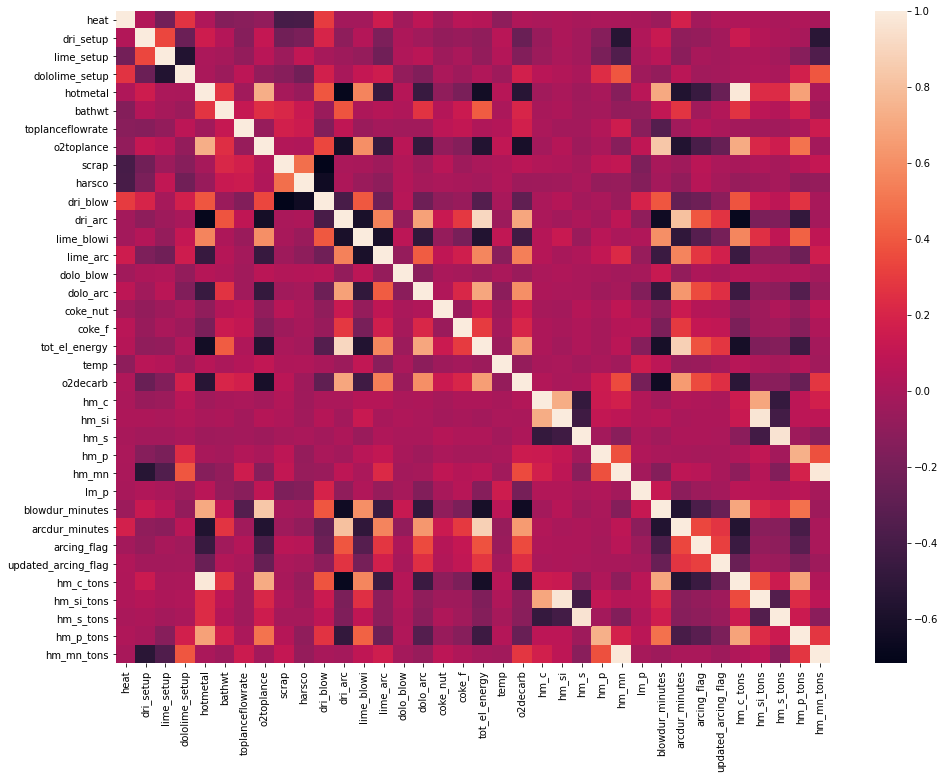

In [175]:
# checking out feature correlations
plt.figure(figsize = (16,12))
corr = ads.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

In [176]:
# saving to local
ads.to_excel(output_path + 'ads.xlsx')

### Training Decision Tree - Iteration 1

#### Prerequisite Functions

In [177]:
def train_decision_tree(df_features,df_target,n_=200,leaf_=10,split_=25,md_=4, random_state = 97):
    
    # Initialise dataframe 
    weights=pd.DataFrame(columns=['Variable','Importance_gain','iteration','rand_index'])
    
    # Instantiate the model with required parameters
    model_=DecisionTreeRegressor(max_depth=md_, random_state=random_state,criterion='mse',min_samples_leaf=leaf_, 
                                    min_samples_split=split_)    

    print(model_)
    model_.fit(df_features,df_target)
    weights = pd.DataFrame(model_.feature_importances_,
                                   index = df_features.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)   
    return model_,weights

In [178]:
def mape(y_pred,y_true,label,key): 
    mape_calc = pd.DataFrame(data=np.column_stack((y_pred,y_true,key)),columns=['predicted','actual','key'])
    mape_calc['mape'] = abs(mape_calc['predicted']-mape_calc['actual'])
    mape_calc = mape_calc[mape_calc['actual']>0]
    mape_calc.to_csv(output_path +label+'_mape_validate.csv')
    
    return mape_calc['mape'].mean()

#### Creating Train-Test split

In [179]:
# separating feature and target columns
#features = [x for x in ads.columns if x != 'lm_p']

# features_imp = ['hm_p','hm_mn','hm_si','hm_c','temp', 'dolo_arc','dolo_blow','dri_arc','dri_blow']

# performance measure = 0.014 -> 0.019 or 0.009
# minimal positive error would be best case scenario
# 0.020 -> if greater than 0.02, then that is a waste heat

# currently no sampling is done, they want to be more sure about phosphorus content, without sampling
# at optimized flux quantity, but optimized quantitiy is coming either from excel model/operator experience
# predicting expected phosphorus
# 
# x = ['dolo_arc','dolo_blow','lime_arc','lime_blowi', 'dolo_setup','lime_setup']
# y = ['lm_p']
# support_variables = [list of other vars]

# experiment with lime_setup, hm_c, arcing_flag, temp

# keeping only features with importance greater than 0
features = [
    #'dri_setup', 
    'lime_setup', 
    'dololime_setup', 
    'hotmetal', 
    'bathwt', 
    #'toplance_height', 
    'toplanceflowrate', 
    'o2toplance', 
    #'scrap', 
    #'harsco', 
    'dri_blow', 
    'dri_arc', 
    'lime_blowi', 
    'lime_arc', 
    'dolo_blow', 
    'dolo_arc', 
    #'coke_nut', 
    'coke_f',
    #'tot_el_energy',
#     'temp',
    'o2decarb',
    #'hm_c',
    #'hm_si',
    #'hm_s',
    #'hm_p',
    #'hm_mn',
    'hm_c_tons',
    'hm_si_tons',
    'hm_s_tons',
    'hm_p_tons',
    'hm_mn_tons',
    #'updated_arcing_flag'
    #'blowdur_minutes',
    #'arcdur_minutes'
]

target = ['lm_p']

# creating train_test_df
train_test_df = ads[features + target]
train_test_df.to_excel(output_path + "train_test_df.xlsx")

In [180]:
# creating train test splits
X_train, X_test, y_train, y_test = train_test_split(train_test_df[features], train_test_df[target], test_size = 0.2, random_state = 43)

#### Optimal Hyperparameters

In [181]:
# # looking at different depths
# param_grid = {'max_depth':[3,4,5],'min_samples_leaf':[10,15,20],'min_samples_split':[20,25,30,35]}
# gridsearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
# gridsearch.fit(X_train,y_train)
# print(gridsearch.best_params_)

#### Training Decision Tree

In [182]:
dtree, weights = train_decision_tree(X_train, y_train, leaf_ = 15, split_ = 20)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=15, min_samples_split=20,
                      random_state=97)


#### Performance Measures

In [183]:
# Predicting on the train and test data
pred_train_rf = dtree.predict(X_train)
pred_test_rf = dtree.predict(X_test)

In [184]:
correlation_matrix = np.corrcoef(pred_train_rf, y_train['lm_p'].to_list())
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("R2 for Train Dataset : ",r_squared)

correlation_matrix = np.corrcoef(pred_test_rf, y_test['lm_p'].to_list())
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("R2 for Test Dataset : ",r_squared)

R2 for Train Dataset :  0.10192897672689892
R2 for Test Dataset :  0.07527452782903342


In [185]:
print("MAPE for train is {}ppm".format(round(mape(pred_train_rf,y_train.values,'train',y_train.index),4)))
print("MAPE for test is {}ppm".format(round(mape(pred_test_rf,y_test.values,'test',y_test.index),4))) 

MAPE for train is 0.0034ppm
MAPE for test is 0.0034ppm


In [186]:
r2_score(y_train, pred_train_rf)

0.1019289767268986

In [187]:
r2_score(y_test, pred_test_rf)

0.07316088172881352

In [188]:
# saving feature importance and correlations to local
weights.reset_index().to_excel(f"{output_path}//weights_{now}.xlsx")
ads.corr().reset_index().to_excel(f"{output_path}//correlation_{now}.xlsx")

In [189]:
# Saving the pickle file
filename =f'{output_path}//model_dt_s_{now}.joblib.pkl'
joblib.dump(dtree, filename, compress=9)

['C:\\Flux\\Codes\\p_model_training\\Output Files//model_dt_s_2022_06_29_12_46_12.joblib.pkl']

In [190]:
# saving the train and test df
train_df = pd.concat([X_train,y_train], axis = 1)
test_df = pd.concat([X_test, y_test], axis = 1)

train_df.to_excel(output_path + "train_df.xlsx")
test_df.to_excel(output_path + "test_df.xlsx")

[Text(418.5, 489.24, 'o2decarb <= 2468.5\nmse = 0.0\nsamples = 7981\nvalue = 0.012'),
 Text(209.25, 380.52000000000004, 'dri_blow <= 12.75\nmse = 0.0\nsamples = 2588\nvalue = 0.013'),
 Text(104.625, 271.8, 'o2decarb <= 2009.0\nmse = 0.0\nsamples = 411\nvalue = 0.011'),
 Text(52.3125, 163.08000000000004, 'bathwt <= 232.25\nmse = 0.0\nsamples = 181\nvalue = 0.012'),
 Text(26.15625, 54.360000000000014, 'mse = 0.0\nsamples = 160\nvalue = 0.012'),
 Text(78.46875, 54.360000000000014, 'mse = 0.0\nsamples = 21\nvalue = 0.015'),
 Text(156.9375, 163.08000000000004, 'dri_arc <= 54.65\nmse = 0.0\nsamples = 230\nvalue = 0.011'),
 Text(130.78125, 54.360000000000014, 'mse = 0.0\nsamples = 99\nvalue = 0.009'),
 Text(183.09375, 54.360000000000014, 'mse = 0.0\nsamples = 131\nvalue = 0.011'),
 Text(313.875, 271.8, 'coke_f <= 398.5\nmse = 0.0\nsamples = 2177\nvalue = 0.014'),
 Text(261.5625, 163.08000000000004, 'dololime_setup <= 0.15\nmse = 0.0\nsamples = 1163\nvalue = 0.013'),
 Text(235.40625, 54.360000

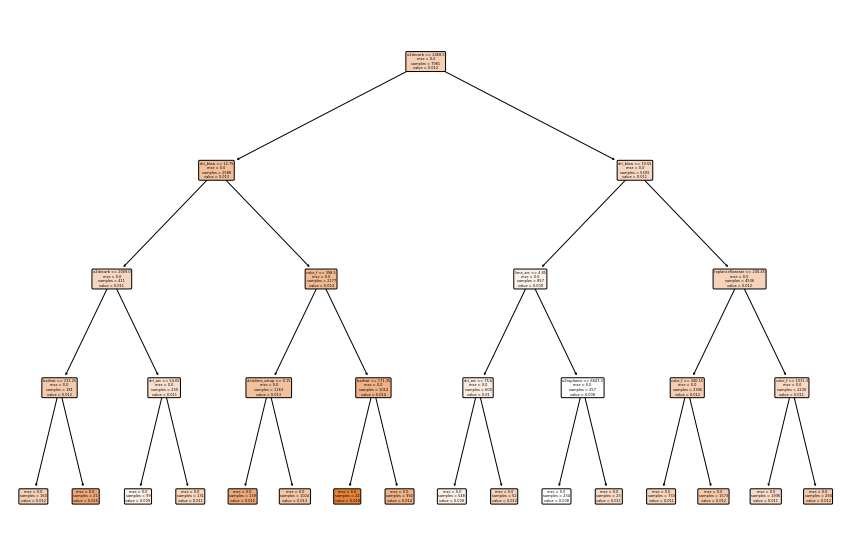

In [191]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(dtree, 
          feature_names=features,
          class_names=["LM_P"], 
          filled=True, impurity=True, 
          rounded=True)



#### Getting the rules of decision tree

In [192]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [193]:
# Print rules
from sklearn.tree import _tree
rules = get_rules(dtree, features, None)

In [194]:
df = pd.DataFrame(columns = ["1", "2","3","4","5","6","7"])
for r in rules:
    str_to_append = str(r).split('and')
    str_to_append
    df_length = len(df)
    if len(str_to_append) < 4:
        str_to_append.insert(2, "")
        str_to_append.insert(3, str_to_append[3].split("then")[0])
        str_to_append.insert(4, str_to_append[4].split("then")[1].split("|")[0])
        str_to_append.insert(5, str_to_append[5].split("then")[1].split("|")[1])
        df.loc[df_length] = str_to_append
    else:
        str_to_append.insert(3, str_to_append[3].split("then")[0])
        str_to_append.insert(4, str_to_append[4].split("then")[1].split("|")[0])
        str_to_append.insert(5, str_to_append[5].split("then")[1].split("|")[1])
        df.loc[df_length] = str_to_append    

In [195]:
# Keeping columns of interest
df_flt = df[['1', '2', '3', '4', '5', '6']]

In [196]:
def replace_strings(row):
    """
    
    This function will replace the strings in the columns
    """
    row['1'] = row['1'].replace('if (','')
    row['1'] = row['1'].replace(') ','')
    row['2'] = row['2'].replace(' (','')
    row['2'] = row['2'].replace(') ','')
    row['3'] = row['3'].replace(' (','')
    row['3'] = row['3'].replace(') ','')
    row['4'] = row['4'].replace(' (','')
    row['4'] = row['4'].replace(') ','')
    row['5'] = row['5'].replace(' response: ','')
    row['5'] = row['5'].replace(' ','')
    row['6'] = row['6'].replace(' based on ','')
    row['6'] = row['6'].replace(' samples','')
    
    return row

In [197]:
# Calling the function to run it
df_flt = df_flt.apply(replace_strings, axis =1)

In [198]:
# Renaming the columns
df_flt.columns = ['Split1','Split2','Split3','Split4','Suggested_value','No_of_Samples']

In [199]:
# Saving the dataset
df_flt.to_excel(f"{output_path}/Decision_Tree_rules_tabular_{now}.xlsx", index=False)

##### Running regression model for each sample

In [200]:
# reading the ads file
# train_test_df = pd.read_excel(f'Temp Outputs//train_test_df.xlsx')

# reading decision tree rules
dt_rules = pd.read_excel(f'{output_path}/Decision_Tree_rules_tabular_{now}.xlsx', engine = 'openpyxl')

# keeping only the split1, split2, split3 & split4 cols
dt_rules = dt_rules[['Split1','Split2','Split3','Split4']]

# extracting rule information from string
def get_rules_from_string(rule):
    
    col = rule.split(' ')[0]
    ope = rule.split(' ')[1]
    val = rule.split(' ')[2]
    
    return col, ope, val

# print rules from rule df
def print_rules(df_name = 'train_df', rules = dt_rules):
    
    main_rules = ''
    for i in range(len(dt_rules)):
        
        df_sub = f'df{i+1}'
        condition_string = ''
        for j in range(0,4):
            col,ope,val = get_rules_from_string(dt_rules.iloc[i,j])
            split_string = '(' + f"{df_name}['{col}'] {ope} {val}" + ')'
            
            if j != 3:
                split_string = split_string + ' & '
            condition_string = condition_string + split_string
            
        rule_string = f"{df_sub} = {df_name}[{condition_string}]"
        main_rules = main_rules + '\n' + rule_string
    
    return main_rules

# print rules from rule df
def get_splits(df_name = 'row', rules = dt_rules):
    
    main_rules = []
    for i in range(len(dt_rules)):
        
        df_sub = f'df{i}'
        condition_string = ''
        for j in range(0,4):
            col,ope,val = get_rules_from_string(dt_rules.iloc[i,j])
            split_string = '(' + f"{df_name}['{col}'] {ope} {val}" + ')'
            
            if j != 3:
                split_string = split_string + ' and '
            condition_string = condition_string + split_string
            
        rule_string = f"elif {condition_string}:"
        main_rules.append(rule_string)
    
    return main_rules

# getting rules
rule_string = print_rules()
# getting rule splits for report
splits = get_splits()

# saving rules locally        
with open(f'{output_path}/rule_string_{now}.txt', 'w') as file:
    file.write(rule_string)
    
# printing here so that user can directly copy
print(rule_string)


df1 = train_df[(train_df['o2decarb'] > 2468.5) & (train_df['dri_blow'] > 10.55) & (train_df['toplanceflowrate'] > 230.45) & (train_df['coke_f'] <= 1031.3)]
df2 = train_df[(train_df['o2decarb'] > 2468.5) & (train_df['dri_blow'] > 10.55) & (train_df['toplanceflowrate'] <= 230.45) & (train_df['coke_f'] > 340.15)]
df3 = train_df[(train_df['o2decarb'] <= 2468.5) & (train_df['dri_blow'] > 12.75) & (train_df['coke_f'] <= 398.5) & (train_df['dololime_setup'] > 0.15)]
df4 = train_df[(train_df['o2decarb'] <= 2468.5) & (train_df['dri_blow'] > 12.75) & (train_df['coke_f'] > 398.5) & (train_df['bathwt'] > 171.35)]
df5 = train_df[(train_df['o2decarb'] > 2468.5) & (train_df['dri_blow'] > 10.55) & (train_df['toplanceflowrate'] <= 230.45) & (train_df['coke_f'] <= 340.15)]
df6 = train_df[(train_df['o2decarb'] > 2468.5) & (train_df['dri_blow'] <= 10.55) & (train_df['lime_arc'] <= 4.85) & (train_df['dri_arc'] <= 75.6)]
df7 = train_df[(train_df['o2decarb'] > 2468.5) & (train_df['dri_blow'] > 10.55) & (tra

In [201]:
df1 = train_df[(train_df['o2decarb'] > 2468.5) & (train_df['dri_blow'] > 10.55) & (train_df['toplanceflowrate'] > 230.45) & (train_df['coke_f'] <= 1031.3)]
df2 = train_df[(train_df['o2decarb'] > 2468.5) & (train_df['dri_blow'] > 10.55) & (train_df['toplanceflowrate'] <= 230.45) & (train_df['coke_f'] > 340.15)]
df3 = train_df[(train_df['o2decarb'] <= 2468.5) & (train_df['dri_blow'] > 12.75) & (train_df['coke_f'] <= 398.5) & (train_df['dololime_setup'] > 0.15)]
df4 = train_df[(train_df['o2decarb'] <= 2468.5) & (train_df['dri_blow'] > 12.75) & (train_df['coke_f'] > 398.5) & (train_df['bathwt'] > 171.35)]
df5 = train_df[(train_df['o2decarb'] > 2468.5) & (train_df['dri_blow'] > 10.55) & (train_df['toplanceflowrate'] <= 230.45) & (train_df['coke_f'] <= 340.15)]
df6 = train_df[(train_df['o2decarb'] > 2468.5) & (train_df['dri_blow'] <= 10.55) & (train_df['lime_arc'] <= 4.85) & (train_df['dri_arc'] <= 75.6)]
df7 = train_df[(train_df['o2decarb'] > 2468.5) & (train_df['dri_blow'] > 10.55) & (train_df['toplanceflowrate'] > 230.45) & (train_df['coke_f'] > 1031.3)]
df8 = train_df[(train_df['o2decarb'] > 2468.5) & (train_df['dri_blow'] <= 10.55) & (train_df['lime_arc'] > 4.85) & (train_df['o2toplance'] <= 6647.3)]
df9 = train_df[(train_df['o2decarb'] <= 2468.5) & (train_df['dri_blow'] <= 12.75) & (train_df['o2decarb'] <= 2009.0) & (train_df['bathwt'] <= 232.25)]
df10 = train_df[(train_df['o2decarb'] <= 2468.5) & (train_df['dri_blow'] > 12.75) & (train_df['coke_f'] <= 398.5) & (train_df['dololime_setup'] <= 0.15)]
df11 = train_df[(train_df['o2decarb'] <= 2468.5) & (train_df['dri_blow'] <= 12.75) & (train_df['o2decarb'] > 2009.0) & (train_df['dri_arc'] > 54.65)]
df12 = train_df[(train_df['o2decarb'] <= 2468.5) & (train_df['dri_blow'] <= 12.75) & (train_df['o2decarb'] > 2009.0) & (train_df['dri_arc'] <= 54.65)]
df13 = train_df[(train_df['o2decarb'] > 2468.5) & (train_df['dri_blow'] <= 10.55) & (train_df['lime_arc'] <= 4.85) & (train_df['dri_arc'] > 75.6)]
df14 = train_df[(train_df['o2decarb'] > 2468.5) & (train_df['dri_blow'] <= 10.55) & (train_df['lime_arc'] > 4.85) & (train_df['o2toplance'] > 6647.3)]
df15 = train_df[(train_df['o2decarb'] <= 2468.5) & (train_df['dri_blow'] > 12.75) & (train_df['coke_f'] > 398.5) & (train_df['bathwt'] <= 171.35)]
df16 = train_df[(train_df['o2decarb'] <= 2468.5) & (train_df['dri_blow'] <= 12.75) & (train_df['o2decarb'] <= 2009.0) & (train_df['bathwt'] > 232.25)]

In [202]:
# Creating a list of dataset
df_list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16]

In [203]:
# dropping unnecessary features in regression
#unnec = ['lime_setup','temp']
#unnec = ['lime_setup','hm_c','temp']
#reg_features = [x for x in features if x not in unnec]

reg_features = [
 #'lime_setup',
 'dololime_setup',
 #'hotmetal',
 #'bathwt',
 #'toplanceflowrate',
 #'o2toplance',
 'dri_blow',
 'dri_arc',
 'lime_blowi',
 'lime_arc',
 'dolo_blow',
 'dolo_arc',
# 'coke_f',
# 'temp',
 'o2decarb',
 'hm_c_tons',
 'hm_si_tons',
 'hm_p_tons',
 'hm_mn_tons'
]

In [204]:
# 'equations' is used to print the rules for the model which can be plugged into the optimization code
equations = []
mapes = []
r2s = []
for i in df_list:
    # Put the target (housing value -- MEDV) in another DataFrame
    X = i[reg_features]
    y = i[["lm_p"]]

    # Note the difference in argument order
    model = sm.OLS(y, X).fit()
    
    predictions = model.predict(X) # make the predictions by the model
    
    # Mape calculation
    y_true, y_pred = np.array(y), np.array(predictions)
    print("MAPE : ", np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
    mapes.append("MAPE : " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100))

    # Print out the statistics
    #model.summary()
    
    # Calculating R Square
    r_squared_table = pd.read_html(model.summary().tables[0].as_html(),header=0,index_col=0)[0]
    r_squared_table.columns = ['1','2','3']
    try:
        adj_r_square = float(r_squared_table[r_squared_table['2']=='Adj. R-squared (uncentered):']['3']) * 100
    except:
        adj_r_square = float(r_squared_table[r_squared_table['2']=='Adj. R-squared:']['3']) * 100

    # Saving R2s
    r2s.append("Adjusted RSquared : " + str(adj_r_square))
    
    # Getting the coefficient table
    coefficient_table = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]

    # Resetting the index
    coefficient_table = coefficient_table.reset_index()

    # Keeping columns of interest
    coefficient_table = coefficient_table[['index','coef']]

    equation = ''
    for i in range(coefficient_table.shape[0]):
        if i == 0:
            equation = str(coefficient_table['coef'][i]) + ' * ' + "row[\'" +str(coefficient_table['index'][i]) +"\']"
        else:
            equation = equation + " + " + str(coefficient_table['coef'][i]) + ' * ' + 'row[\'' + str(coefficient_table['index'][i]) + '\']'
    
    # saving equations
    equations.append("row['lm_p_predicted'] = " + equation)
    
    print("Adjusted R2 : ",adj_r_square)       
    print(equation)

MAPE :  33.29388238037832
Adjusted R2 :  87.6
-0.0002 * row['dololime_setup'] + 6.64e-05 * row['dri_blow'] + 8.425e-05 * row['dri_arc'] + -0.0002 * row['lime_blowi'] + -7.735e-05 * row['lime_arc'] + -6.731e-05 * row['dolo_blow'] + -0.0004 * row['dolo_arc'] + -6.845e-07 * row['o2decarb'] + 0.0011 * row['hm_c_tons'] + 0.0002 * row['hm_si_tons'] + 0.0214 * row['hm_p_tons'] + 0.0003 * row['hm_mn_tons']
MAPE :  32.734035849975214
Adjusted R2 :  88.8
-0.0002 * row['dololime_setup'] + 5.605e-05 * row['dri_blow'] + 6.982e-05 * row['dri_arc'] + -0.0003 * row['lime_blowi'] + -2.663e-06 * row['lime_arc'] + -0.0005 * row['dolo_blow'] + -0.0004 * row['dolo_arc'] + -5.209e-07 * row['o2decarb'] + 0.0017 * row['hm_c_tons'] + 0.0004 * row['hm_si_tons'] + 0.006 * row['hm_p_tons'] + 0.0008 * row['hm_mn_tons']
MAPE :  37.221466433247265
Adjusted R2 :  86.7
0.0004 * row['dololime_setup'] + 8.103e-05 * row['dri_blow'] + 7.429e-05 * row['dri_arc'] + -0.0003 * row['lime_blowi'] + 2.236e-06 * row['lime_arc'] +

In [205]:
with open(f'{output_path}/model_report.txt','w') as file:
    
#     # writing time period
#     file.write("Time period : " + train_test_time_period)
#     file.write("\n")
    
    # writing features
    file.write("\n ##################### Features used ####################### \n")
    file.write("\n Decision Tree features\n")
    file.write(", ".join(features))
    file.write("\n Regression Features \n")
    file.write(", ".join(reg_features))
    file.write("\n")
    
    # model summary
    file.write("\n ##################### Model Summary #######################\n")
    for i in range(len(equations)):
        file.write(mapes[i])
        file.write('\n')
        file.write(r2s[i])
        file.write('\n')
        file.write(equations[i])
        file.write('\n')
        file.write('\n')
    
    # writing rules for optimization python code
    file.write("\n ############## Rules for Prediction Python Code ################ \n")
    for i in range(len(splits)):
        file.write(splits[i])
        file.write('\n\t')
        file.write(equations[i])
        file.write('\n\n')


In [207]:

os.getcwd()

'C:\\Flux\\Codes\\p_model_training'